<p style="text-align: center;">
  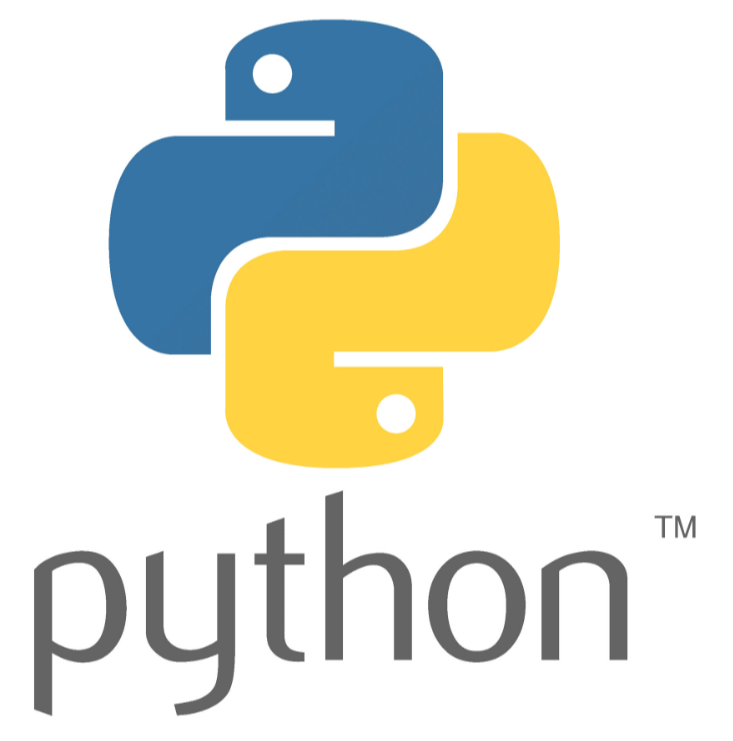
</p>

<h3 style="text-align: center;"><b>Семинар №6 ФБМФ МФТИ</b></h3>

https://cs.mipt.ru/gertsev/fbmf/category/intro_python.html

# Рефакторинг

Рефа́кторинг (англ. refactoring) или перепроектирование, переработка кода — это процесс изменения внутренней структуры программы, не затрагивающий её внешнего поведения и имеющий целью облегчить понимание её работы.

In [ ]:
import pygame
import math

def draw_head(surface, x, y, radius, color):
    pygame.draw.circle(surface, color, (x, y), radius)

def draw_eye(surface, x, y, radius, color):
    pygame.draw.circle(surface, color, (x, y), radius)

def draw_mouth(surface, x, y, width, height, color):
    # Рисуем дугу для улыбки
    rect = pygame.Rect(x - width//2, y - height//2, width, height)
    pygame.draw.arc(surface, color, rect, math.pi, 2*math.pi, 3)  # улыбка

def draw_smile(surface, x, y, size):
    # Голова
    draw_head(surface, x, y, size, (255, 255, 0))  # желтый
    # Глаза
    eye_radius = size // 5
    draw_eye(surface, x - size//3, y - size//3, eye_radius, (0, 0, 0))
    draw_eye(surface, x + size//3, y - size//3, eye_radius, (0, 0, 0))
    # Рот
    draw_mouth(surface, x, y + size//4, size, size//2, (0, 0, 0))

In [ ]:
import pygame

pygame.init()
screen = pygame.display.set_mode((600, 1000))
pygame.display.set_caption("Смайлик")

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    screen.fill((200, 200, 200))
    draw_smile(screen, 200, 200, 100)
    draw_smile(screen, 200, 600, 100)
    pygame.display.flip()

pygame.quit()

## Более сложный пример

draw_hare(surface, x, y, width, height, color)

Подождите, а что значат эти x и y? Это координаты центра зайца или, может быть, кончика левого уха? В каком формате нужно задавать color? Все это должно быть где-то описано...

In [ ]:
def draw_hare(surface, x, y, width, height, color):
  '''
  Рисует зайца на экране.
  surface - объект pygame.Surface
  x, y - координаты левого верхнего угла изображения
  width, height - ширина и высота изобажения
  color - цвет, заданный в формате, подходящем для pygame.Color
  '''

In [ ]:
help(draw_hare)

In [ ]:
В функции draw_body координаты x, y — это центр тела.

Но Pygame хочет левый верхний угол. Значит, чтобы эллипс оказался с центром в (x, y), надо сместить прямоугольник:

левый верхний угол по X = x - width // 2
левый верхний угол по Y = y - height // 2


width // 2 — половина ширины тела

height // 2 — половина высоты тела

Теперь центр эллипса совпадает с (x, y).

In [ ]:
import pygame

def draw_body(surface, x, y, width, height, color):
    '''
    Рисует тело зайца.
    surface - объект pygame.Surface
    x, y - координаты центра изображения
    width, height - ширина и высота изображения
    color - цвет, заданный в формате, подходящем для pygame.Color
    '''
    pygame.draw.ellipse(surface, color, (x - width // 2, y - height // 2, width, height))


def draw_head(surface, x, y, size, color):
    '''
    Рисует голову зайца.
    surface - объект pygame.Surface
    x, y - координаты центра изображения
    size - диаметр головы
    color - цвет, заданный в формате, подходящем для pygame.Color
    '''
    pygame.draw.circle(surface, color, (x, y), size // 2)


def draw_ear(surface, x, y, width, height, color):
    '''
    Рисует ухо зайца.
    surface - объект pygame.Surface
    x, y - координаты центра изображения
    width, height - ширина и высота изображения
    color - цвет, заданный в формате, подходящем для pygame.Color
    '''
    pygame.draw.ellipse(surface, color, (x - width // 2, y - height // 2, width, height))


def draw_leg(surface, x, y, width, height, color):
    '''
    Рисует ногу зайца.
    surface - объект pygame.Surface
    x, y - координаты центра изображения
    width, height - ширина и высота изображения
    color - цвет, заданный в формате, подходящем для pygame.Color
    '''
    pygame.draw.ellipse(surface, color, (x - width // 2, y - height // 2, width, height))




def draw_eye(surface, x, y, size, color):
    '''
    Рисует глаз зайца.
    surface - объект pygame.Surface
    x, y - координаты центра глаза
    size - диаметр глаза
    color - цвет, заданный в формате, подходящем для pygame.Color
    '''
    pygame.draw.circle(surface, color, (x, y), size // 2)


def draw_nose(surface, x, y, size, color):
    '''
    Рисует нос зайца (треугольник).
    surface - объект pygame.Surface
    x, y - координаты центра носа
    size - размер носа
    color - цвет, заданный в формате, подходящем для pygame.Color
    '''
    pygame.draw.polygon(surface, color, [
        (x, y),
        (x - size // 2, y + size),
        (x + size // 2, y + size)
    ])


def draw_hare(surface, x, y, width, height, color):
    '''
    Рисует зайца на экране.
    surface - объект pygame.Surface
    x, y - координаты центра изображения
    width, height - ширина и высота изображения
    color - цвет, заданный в формате, подходящем для pygame.Color
    '''
    # Тело
    #Тело — эллипс
    #Ширина тела = половина общей ширины зайца.
    #Высота тела = половина общей высоты зайца.
    #Y координата тела смещена вниз (y + body_height // 2), чтобы центр тела был ниже центра всего зайца.
    #X координата совпадает с центром всего изображения.

    body_width = width // 2
    body_height = height // 2
    body_y = y + body_height // 2
    draw_body(surface, x, body_y, body_width, body_height, color)

    # Голова
    # Голова — круг
    # Диаметр головы = 1/4 высоты всего зайца
    #Центр головы смещён немного вверх (y - head_size // 2), чтобы голова была над телом
    #X координата совпадает с центром всего изображения.
    head_size = height // 4
    head_y = y - head_size // 2
    draw_head(surface, x, head_y, head_size, color)

    # Уши
    ear_height = height // 3
    ear_y = y - height // 2 + ear_height // 2
    for ear_x in (x - head_size // 4, x + head_size // 4):
        draw_ear(surface, ear_x, ear_y, width // 8, ear_height, color)

    # Лапы
    leg_height = height // 16
    leg_y = y + height // 2 - leg_height // 2
    for leg_x in (x - width // 4, x + width // 4):
        draw_leg(surface, leg_x, leg_y, width // 4, leg_height, color)


    # Глаза
    eye_size = head_size // 6
    eye_y = head_y - head_size // 6
    eye_offset = head_size // 4
    draw_eye(surface, x - eye_offset, eye_y, eye_size, (0, 0, 0))
    draw_eye(surface, x + eye_offset, eye_y, eye_size, (0, 0, 0))

    # Нос
    nose_size = head_size // 6
    nose_y = head_y + head_size // 8
    draw_nose(surface, x, nose_y, nose_size, (0, 0, 0))


In [ ]:
pygame.init()
screen = pygame.display.set_mode((600, 400))
pygame.display.set_caption("Заяц")

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    screen.fill((200, 255, 200)) 
    draw_hare(screen, 200, 200, 200, 400, (200, 200, 200))
    pygame.display.flip()

pygame.quit()

In [ ]:
help(draw_hare)

draw_hare(screen, 200, 200, 200, 400, (200, 200, 200))

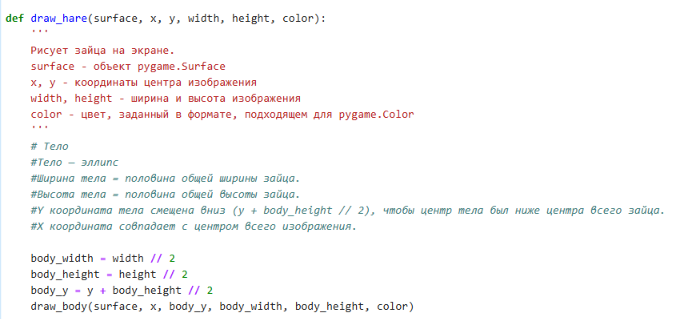

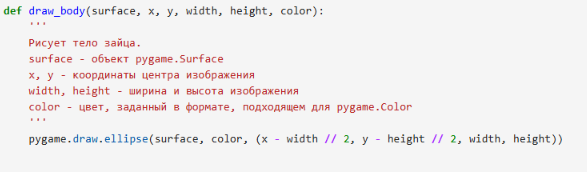

In [ ]:
pygame.init()
screen = pygame.display.set_mode((600, 400))
pygame.display.set_caption("Зайцы")

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    screen.fill((200, 255, 200)) 
    draw_hare(screen, 200, 200, 200, 400, (200, 200, 200))
    draw_hare(screen, 400, 200, 200, 400, (200, 200, 200))
    pygame.display.flip()

pygame.quit()

# События в pygame

In [ ]:
import pygame
pygame.init()                         
screen = pygame.display.set_mode((400, 300))  
pygame.display.set_caption("Самый простой пример")

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:  
            running = False

    screen.fill((30, 144, 255))   
    
    pygame.display.flip()               

pygame.quit()     

## события мыши

| Кнопка мыши              | Значение `button` |
| ------------------------ | ----------------: |
| Левая                    |                 1 |
| Средняя                  |                 2 |
| Правая                   |                 3 |
| Колесо вперёд (скролл ↑) |                 4 |
| Колесо назад (скролл ↓)  |                 5 |

Координаты мыши записываются в атрибут pos. Таким образом, если вы нажали правую кнопку мыши точно в середине окна размером 200x200, то будет создан объект типа Event с полями event.type = pygame.MOUSEBUTTONDOWN, event.button = 3, event.pos = (100, 100).

движение пальцем генерирует событие MOUSEMOTION

тап одним пальцем = MOUSEBUTTONDOWN с event.button == 1 (левая кнопка)

тап двумя пальцами часто эмулирует event.button == 3 (правая кнопка)

прокрутка двумя пальцами создаёт события event.button == 4 (вперёд) и 5 (назад)

In [ ]:
import pygame
pygame.init()                         
screen = pygame.display.set_mode((400, 300))  
pygame.display.set_caption("Самый простой пример")

running = True
 
while running:  
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            if event.button == 1:
                pygame.draw.circle(screen, (255, 0, 0), event.pos, 50)
            elif event.button == 3:
                pygame.draw.circle(screen, (0, 0, 255), event.pos, 50)
    
    pygame.display.flip()               

pygame.quit()     

У событий MOUSEMOTION есть еще один атрибут – rel. Он показывает относительное смещение по обеим осям

rel удобно использовать, если нужно отрисовывать линии или следы, или определять скорость движения

In [ ]:
import pygame
pygame.init()                         
screen = pygame.display.set_mode((400, 300))  
pygame.display.set_caption("Пример следа")

running = True

# координаты для относительного старта следа мыши
x, y = 200, 150  

while running:  
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        
        elif event.type == pygame.MOUSEBUTTONDOWN:
            if event.button == 1:
                pygame.draw.circle(screen, (255, 0, 0), event.pos, 50)
            elif event.button == 3:
                pygame.draw.circle(screen, (0, 0, 255), event.pos, 50)

        elif event.type == pygame.MOUSEMOTION:
            # event.rel = (dx, dy) — относительное смещение
            dx, dy = event.rel
            x += dx
            y += dy
            pygame.draw.circle(screen, (0, 255, 0), (x, y), 5)

    pygame.display.flip()               

pygame.quit()

x, y = pygame.mouse.get_pos()

## события клавиш

In [ ]:
import pygame
pygame.init()

screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Движение кружка по шагам")

x, y = 200, 150
radius = 20
step = 20  

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                y -= step
            elif event.key == pygame.K_DOWN:
                y += step
            elif event.key == pygame.K_LEFT:
                x -= step
            elif event.key == pygame.K_RIGHT:
                x += step

            x = max(radius, min(400 - radius, x))
            y = max(radius, min(300 - radius, y))

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (0, 255, 0), (x, y), radius)
    pygame.display.flip()
    pygame.time.delay(20)

pygame.quit()

In [ ]:
import pygame
pygame.init()

screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Плавное движение кружка")

x, y = 200, 150
radius = 20
speed = 0.01

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    keys = pygame.key.get_pressed()
    if keys[pygame.K_UP]:
        y -= speed
    if keys[pygame.K_DOWN]:
        y += speed
    if keys[pygame.K_LEFT]:
        x -= speed
    if keys[pygame.K_RIGHT]:
        x += speed

    x = max(radius, min(400 - radius, x))
    y = max(radius, min(300 - radius, y))

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (0, 255, 0), (x, y), radius)
    pygame.display.flip()
pygame.quit()

# Первая игра

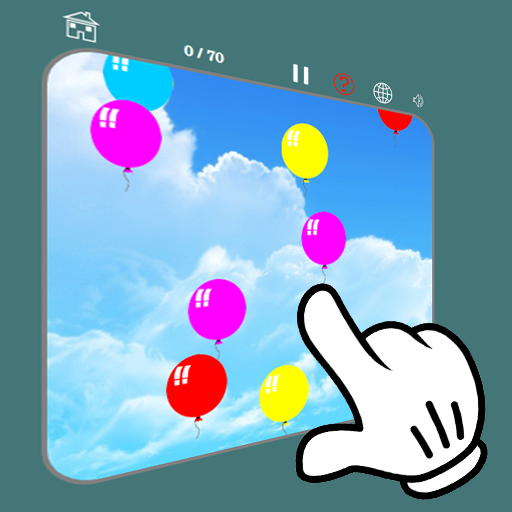

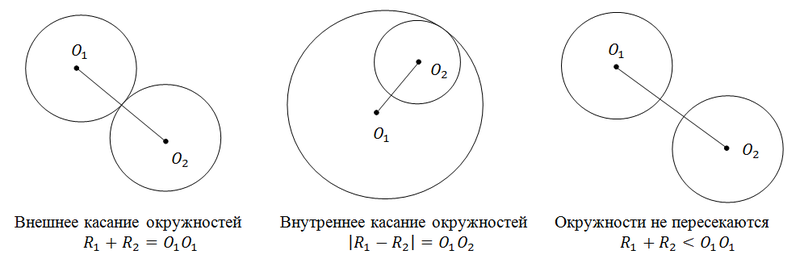

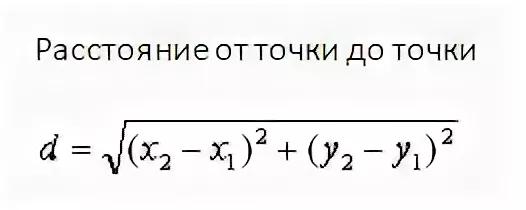

In [ ]:
import pygame
import random

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Простейшая игра")
font = pygame.font.SysFont(None, 30)


player_radius = 15
target_radius = 20
score = 0


target_x = random.randint(target_radius, 400 - target_radius)
target_y = random.randint(target_radius, 300 - target_radius)



running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    player_x, player_y = pygame.mouse.get_pos()

    dx = player_x - target_x
    dy = player_y - target_y
    distance = (dx**2 + dy**2)**0.5
    if distance < player_radius + target_radius:
        score += 1
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (255, 0, 0), (target_x, target_y), target_radius)  
    pygame.draw.circle(screen, (0, 255, 0), (player_x, player_y), player_radius) 

    text = font.render(f"Score: {score}", True, (255, 255, 255))
    screen.blit(text, (10, 10))

    pygame.display.flip()

pygame.quit()

pygame.time.get_ticks() — функция в модуле pygame, которая возвращает количество миллисекунд, прошедших с момента инициализации Pygame

In [ ]:
import pygame
import random

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Простейшая игра но на время :)))")
font = pygame.font.SysFont(None, 30)

player_radius = 15
target_radius = 20
score = 0

# Изначальные координаты цели и время её появления
target_x = random.randint(target_radius, 400 - target_radius)
target_y = random.randint(target_radius, 300 - target_radius)
target_spawn_time = pygame.time.get_ticks()  # время появления цели
target_visible_duration = 3000  # 3 секунды в миллисекундах

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    player_x, player_y = pygame.mouse.get_pos()

    dx = player_x - target_x
    dy = player_y - target_y
    distance = (dx**2 + dy**2)**0.5
    if distance < player_radius + target_radius:
        score += 1
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = pygame.time.get_ticks()  # обновляем время появления

    # Проверка пора ли скрыть цель 
    current_time = pygame.time.get_ticks()
    if current_time - target_spawn_time > target_visible_duration:
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = current_time

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (255, 0, 0), (target_x, target_y), target_radius)  
    pygame.draw.circle(screen, (0, 255, 0), (player_x, player_y), player_radius) 

    text = font.render(f"Score: {score}", True, (255, 255, 255))
    screen.blit(text, (10, 10))

    pygame.display.flip()

pygame.quit()

In [ ]:
import pygame
import random

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Простейшая игра c проигрышем")
font = pygame.font.SysFont(None, 30)

player_radius = 15
target_radius = 20
score = 0
missed_streak = 0  # Счётчик пропущенных шариков

target_x = random.randint(target_radius, 400 - target_radius)
target_y = random.randint(target_radius, 300 - target_radius)
target_spawn_time = pygame.time.get_ticks() 
target_visible_duration = 3000  

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    player_x, player_y = pygame.mouse.get_pos()

    dx = player_x - target_x
    dy = player_y - target_y
    distance = (dx**2 + dy**2)**0.5
    caught = False
    if distance < player_radius + target_radius:
        score += 1
        caught = True
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = pygame.time.get_ticks()

    # Проверка, нужно ли скрыть цель после 3 секунд
    current_time = pygame.time.get_ticks()
    if current_time - target_spawn_time > target_visible_duration:
        # Если шарик не пойман, увеличиваем счётчик пропущенных
        if not caught:
            missed_streak += 1
        if missed_streak >= 2:
            print("Вы проиграли!")
            running = False
        # Появление нового шарика
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = current_time

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (255, 0, 0), (target_x, target_y), target_radius)  
    pygame.draw.circle(screen, (0, 255, 0), (player_x, player_y), player_radius) 

    text = font.render(f"Score: {score}", True, (255, 255, 255))
    screen.blit(text, (10, 10))

    pygame.display.flip()

pygame.quit()

# Вторая игра

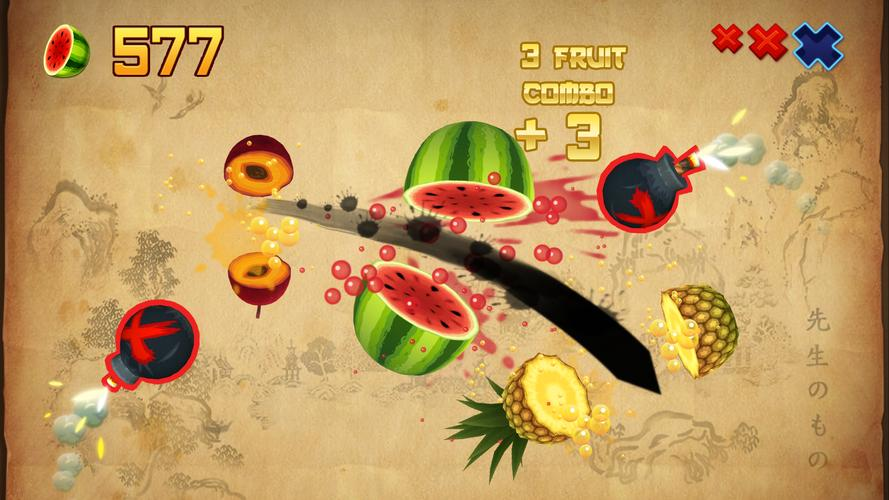

In [ ]:
import pygame
import random

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Простейшая игра")
font = pygame.font.SysFont(None, 30)

player_radius = 15
target_radius = 20
enemy_radius = 20

score = 0
missed_streak = 0

target_x = random.randint(target_radius, 400 - target_radius)
target_y = random.randint(target_radius, 300 - target_radius)
target_spawn_time = pygame.time.get_ticks()
target_visible_duration = 3000  # 3 секунды

enemy_x = random.randint(enemy_radius, 400 - enemy_radius)
enemy_y = random.randint(enemy_radius, 300 - enemy_radius)
enemy_spawn_time = pygame.time.get_ticks()
enemy_visible_duration = 2000  # 2 секунды

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    player_x, player_y = pygame.mouse.get_pos()
    current_time = pygame.time.get_ticks()

    # Проверка столкновения с красным шаром 
    dx = player_x - target_x
    dy = player_y - target_y
    if (dx**2 + dy**2)**0.5 < player_radius + target_radius:
        score += 1
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = current_time

    # Проверка столкновения с чёрным шаром 
    dx_e = player_x - enemy_x
    dy_e = player_y - enemy_y
    if (dx_e**2 + dy_e**2)**0.5 < player_radius + enemy_radius:
        print("Вы проиграли! (прикоснулись к чёрному шару)")
        running = False

    # Проверка времени жизни красного шара
    if current_time - target_spawn_time > target_visible_duration:
        missed_streak += 1
        if missed_streak >= 2:
            print("Вы проиграли! (дважды пропустили)")
            running = False
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = current_time

    # Проверка времени жизни чёрного шара 
    if current_time - enemy_spawn_time > enemy_visible_duration:
        enemy_x = random.randint(enemy_radius, 400 - enemy_radius)
        enemy_y = random.randint(enemy_radius, 300 - enemy_radius)
        enemy_spawn_time = current_time

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (255, 0, 0), (target_x, target_y), target_radius) 
    pygame.draw.circle(screen, (0, 255, 0), (player_x, player_y), player_radius)  
    pygame.draw.circle(screen, (0, 0, 0), (enemy_x, enemy_y), enemy_radius)      

    text = font.render(f"Score: {score}", True, (255, 255, 255))
    screen.blit(text, (10, 10))

    pygame.display.flip()

pygame.quit()

# Задание

In [ ]:
import pygame
import random

pygame.init()

screen = pygame.display.set_mode((400, 400))
pygame.display.set_caption("Падающие шары")


spawn_points = [(50, 50), (150, 50), (250, 50), (350, 50)]

running = True
clock = pygame.time.Clock()

balls = []  # список активных шаров (координаты)
spawn_interval = 2000  
last_spawn_time = 0

while running:
    current_time = pygame.time.get_ticks()

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    if current_time - last_spawn_time > spawn_interval:
        x, y = random.choice(spawn_points)
        balls.append([x, y])
        last_spawn_time = current_time

    for ball in balls:
        ball[1] += 0.01  # пикселей в миллисекунду

    # Убираем шары, которые упали ниже 
    balls = [ball for ball in balls if ball[1] < 400]

    screen.fill((255, 255, 255))
    for x, y in balls:
        pygame.draw.circle(screen, (255, 0, 0), (x, y), 20)

    pygame.display.flip()

pygame.quit()

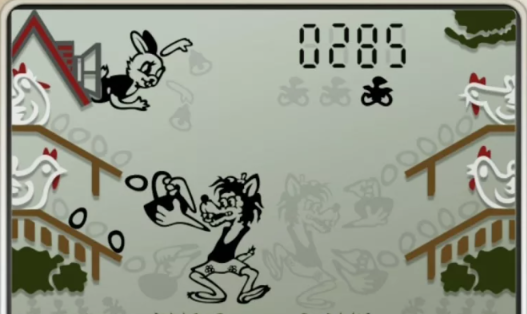

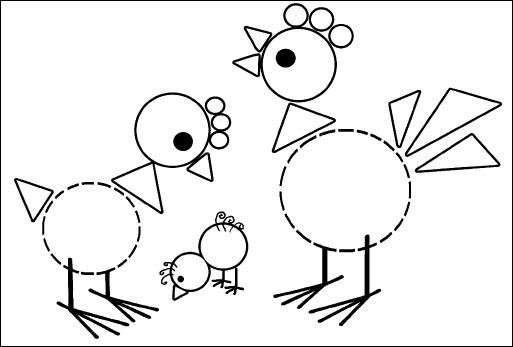